In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("aac_intakes_outcomes.csv", encoding="utf-8", low_memory=False)

In [5]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [6]:
data["outcome_type"].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [35]:
animal_color = data.loc[data["outcome_type"]=="Adoption"]
animal_color = animal_color[["animal_type", "color", "animal_id_outcome"]]
animal_color.head()

,animal_type,color,animal_id_outcome
12,Dog,Black/Tan,A200922
14,Dog,Tan/Black,A210457
22,Dog,Sable/White,A226069
32,Dog,Black/Brown,A249087
48,Dog,Tricolor,A274546


In [34]:
#animal_breed["animal_type"].unique()
#animal_breed["breed"].unique()
#animal_breed["color"].unique()

In [36]:
animal_color_group = animal_color.groupby(["animal_type","color"]).count()
animal_color_group.head()

animal_id_outcome
animal_type color                             
Bird        Black                            2
            Black/Chocolate                  5
            Black/Cream                      3
            Black/Red                        9
            Black/Tricolor                   1

In [37]:
animal_color_total = animal_breed_group.reset_index()
animal_color_total.sort_values(["animal_type", "animal_id_outcome"], ascending=False, inplace=True)
animal_color_total.rename(columns={"animal_id_outcome":"count"}, inplace=True)
animal_color_total.head()

,animal_type,color,count
498,Other,White/Black,33
460,Other,Black,30
497,Other,White,30
500,Other,White/Brown,14
466,Other,Black/White,13


In [25]:
def getTop10(dataset, animalType):
    return dataset.loc[dataset["animal_type"] == animalType][0:10]

In [26]:
#animal_bread_total.loc[animal_bread_total["animal_type"] == "Bird"][0:10]
dog_top10 = getTop10(animal_breed_total, "Dog")
#dog_top10

In [27]:
cat_top10 = getTop10(animal_breed_total, "Cat")
#cat_top10

In [28]:
bird_top10 = getTop10(animal_breed_total, "Bird")
#bird_top10

In [29]:
other_top10 = getTop10(animal_breed_total, "Other")
#other_top10

In [30]:
#getTop10(animal_breed_total, "Bird")

In [31]:
#getTop10(animal_breed_total, "Bird")

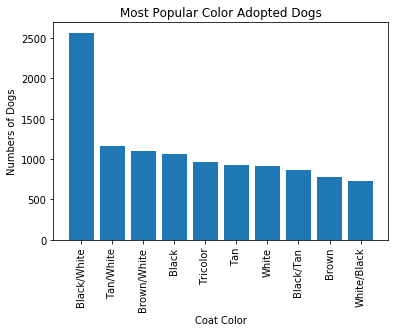

In [41]:
plt.xticks(rotation=90)
p1 = plt.bar(dog_top10["color"], dog_top10["count"])
#p2 = plt.bar(cat_top10["breed"], cat_top10["count"])
#p3 = plt.bar(bird_top10["breed"], bird_top10["count"])
#p3 = plt.bar(other_top10["breed"], other_top10["count"])
plt.xlabel('Coat Color')
plt.ylabel('Numbers of Dogs')
plt.title('Most Popular Color Adopted Dogs')
plt.show()

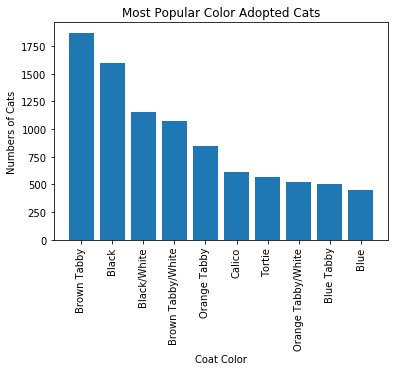

In [42]:
plt.xticks(rotation=90)
#p1 = plt.bar(dog_top10["breed"], dog_top10["count"])
p2 = plt.bar(cat_top10["color"], cat_top10["count"])
#p3 = plt.bar(bird_top10["breed"], bird_top10["count"])
#p3 = plt.bar(other_top10["breed"], other_top10["count"])
plt.xlabel('Coat Color')
plt.ylabel('Numbers of Cats')
plt.title('Most Popular Color Adopted Cats')
plt.show()